In [28]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [29]:
!pip install pandas_profiling

In [30]:
import pandas_profiling as pp

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
df = pd.read_csv("/content/drive/MyDrive/spark/final.csv")
df.head()

,index,url,name,sub_title,model,color,price,currency,scraped_at,Age,Purchased
0,0,https://www.nike.com/t/dri-fit-team-minnesota-...,Nike Dri-FIT Team (MLB Minnesota Twins),Men's Long-Sleeve T-Shirt,14226571,Navy,40.00,USD,20-09-2022 23:32,19,0
1,1,https://www.nike.com/t/dri-fit-team-minnesota-...,Club América,Women's Nike Dri-FIT Soccer Jersey Dress,13814665,Black/Black,90.00,USD,20-09-2022 23:32,35,1
2,2,https://www.nike.com/t/dri-fit-team-minnesota-...,Nike Sportswear Swoosh,Women's Nike Dri-FIT Soccer Jersey Dress,13015648,Black/White,140.00,USD,20-09-2022 23:33,26,1
3,3,https://www.nike.com/t/dri-fit-team-minnesota-...,Nike Dri-FIT One Luxe,Women's Nike Dri-FIT Soccer Jersey Dress,13809796,Black/Rush Pink,22.97,USD,20-09-2022 23:33,27,0
4,4,https://www.nike.com/t/paris-saint-germain-rep...,Paris Saint-Germain Repel Academy AWF,Women's Nike Dri-FIT Soccer Jersey Dress,13327415,Dark Grey/Black/Siren Red/Siren Red,70.00,USD,20-09-2022 23:33,19,1


In [33]:
df.isnull().sum()

index         0
url           0
name          0
sub_title     0
model         0
color         2
price         0
currency      0
scraped_at    0
Age           0
Purchased     0
dtype: int64

In [34]:
df.describe()

,index,model,price,Age,Purchased
count,112.000000,1.120000e+02,112.000000,112.000000,112.000000
mean,55.500000,9.298439e+07,61.506250,30.169643,0.678571
std,32.475632,2.698557e+08,39.887738,8.003252,0.469124
min,0.000000,1.013351e+07,9.970000,18.000000,0.000000
25%,27.750000,1.329489e+07,31.720000,25.000000,0.000000
50%,55.500000,1.389103e+07,45.000000,28.000000,1.000000
75%,83.250000,1.406539e+07,85.242500,33.250000,1.000000
max,111.000000,1.007648e+09,175.000000,59.000000,1.000000


In [35]:
print(df.nunique())

index         112
url            41
name           96
sub_title      29
model         112
color          76
price          63
currency        1
scraped_at     21
Age            27
Purchased       2
dtype: int64


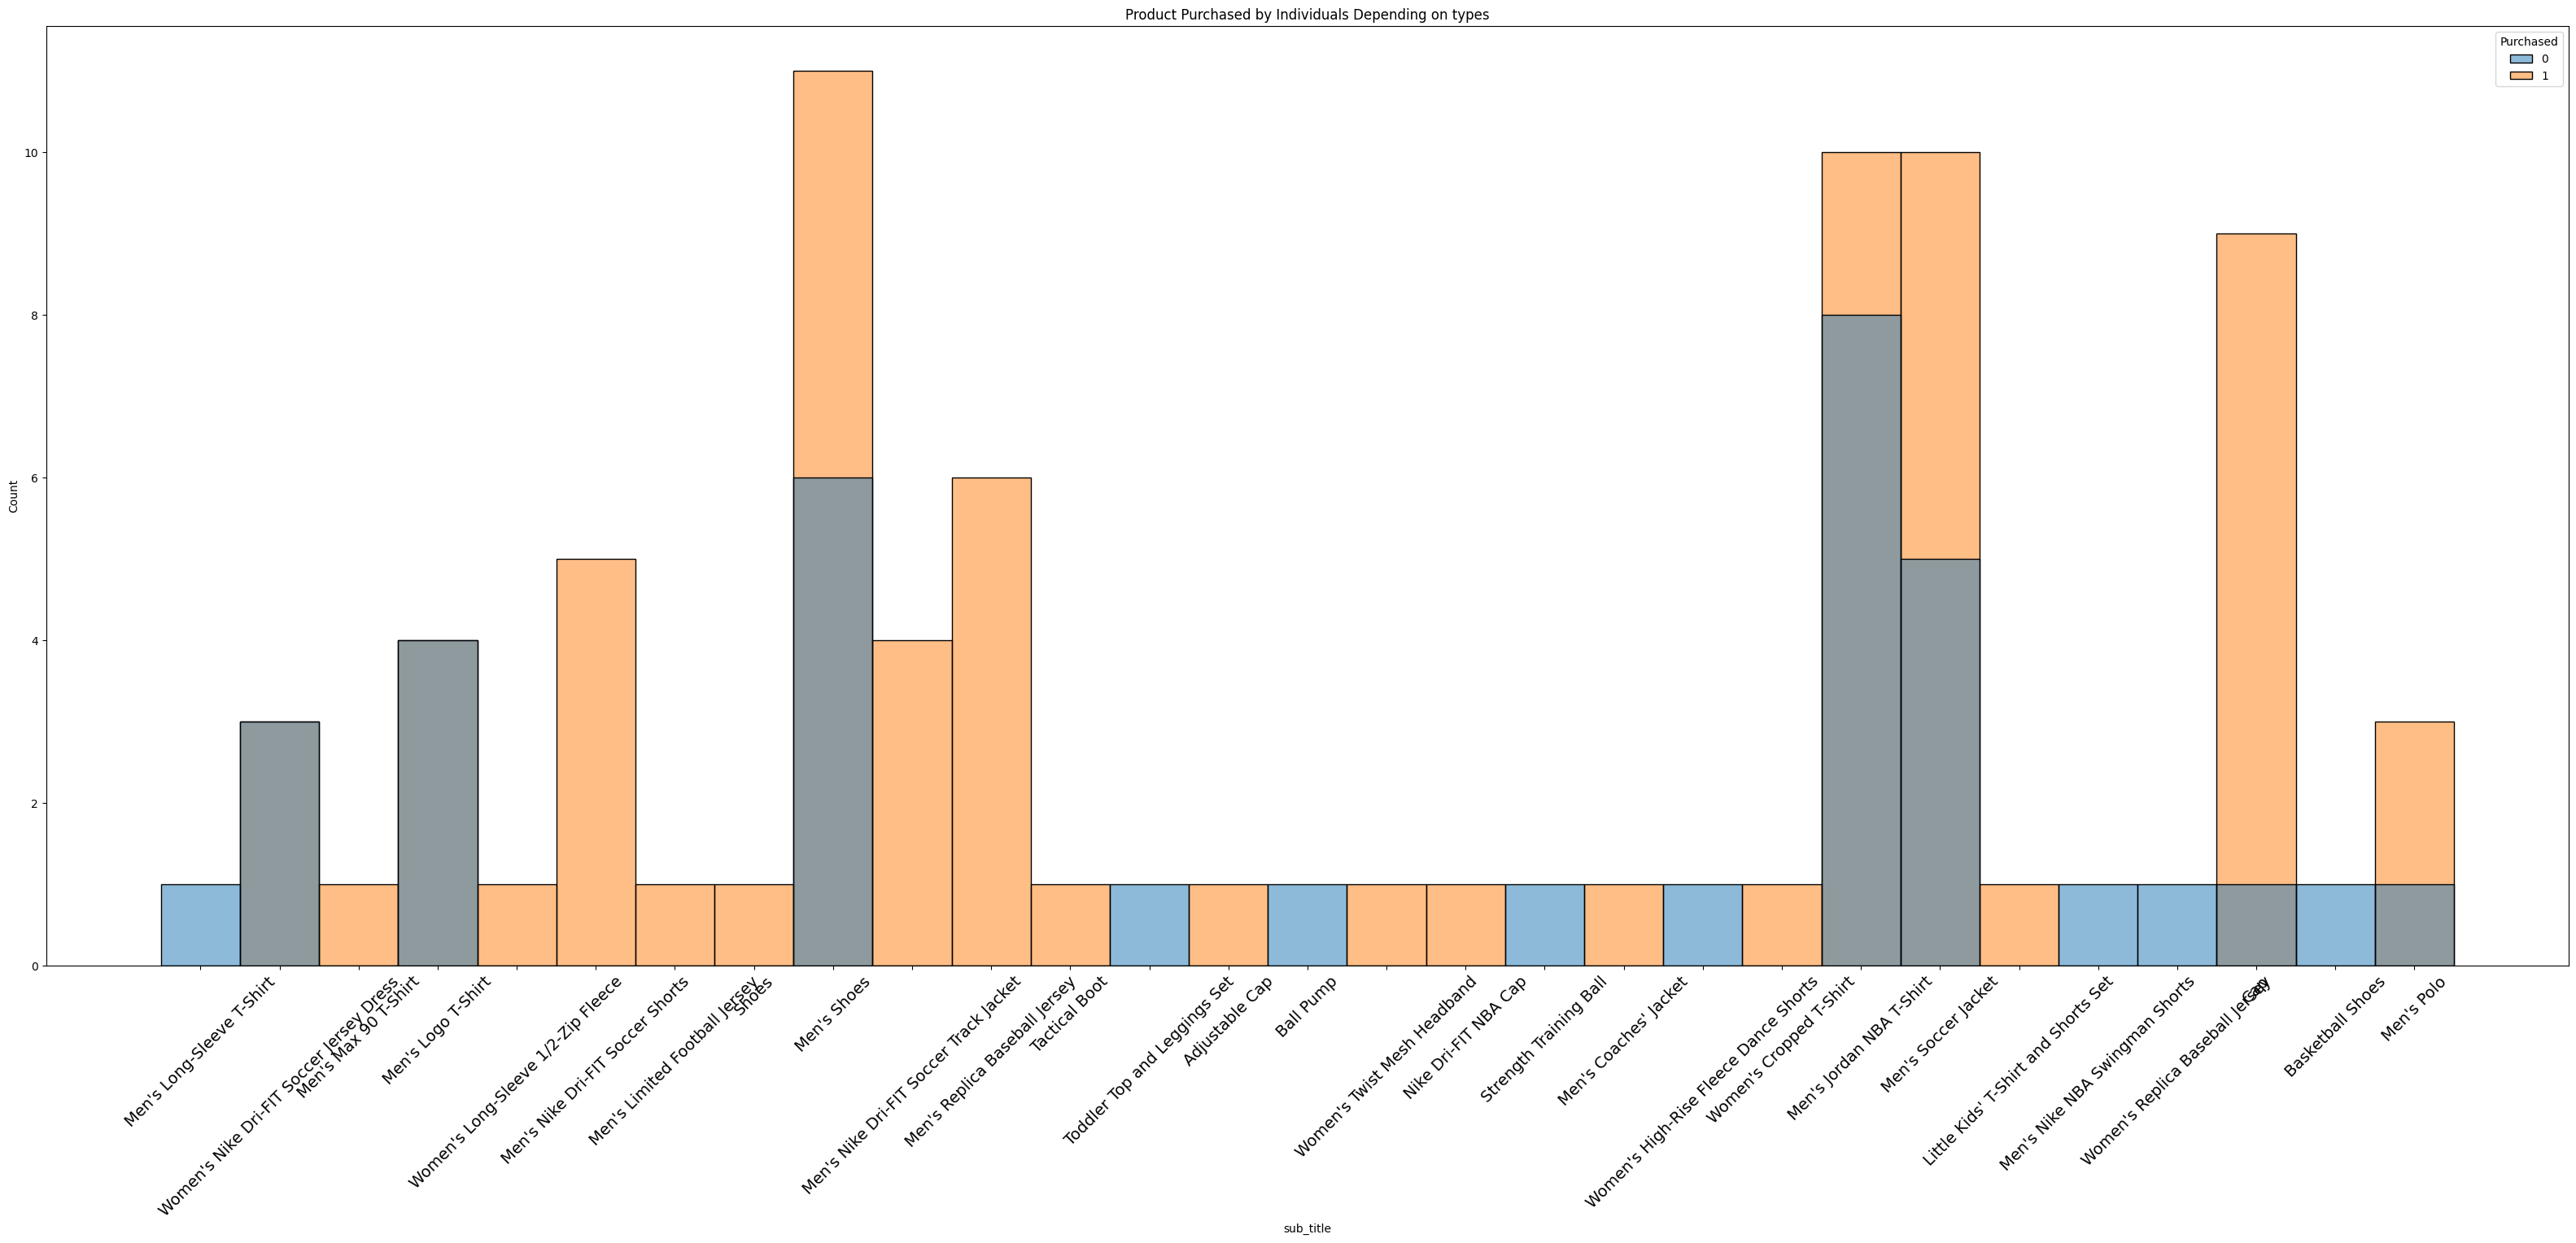

In [36]:
plt.figure(figsize=(40, 15))
plt.title("Product Purchased by Individuals Depending on types")
plt.xticks(rotation = 45, fontsize = 14)
sns.histplot(data=df, x="sub_title", hue="Purchased")
plt.show()

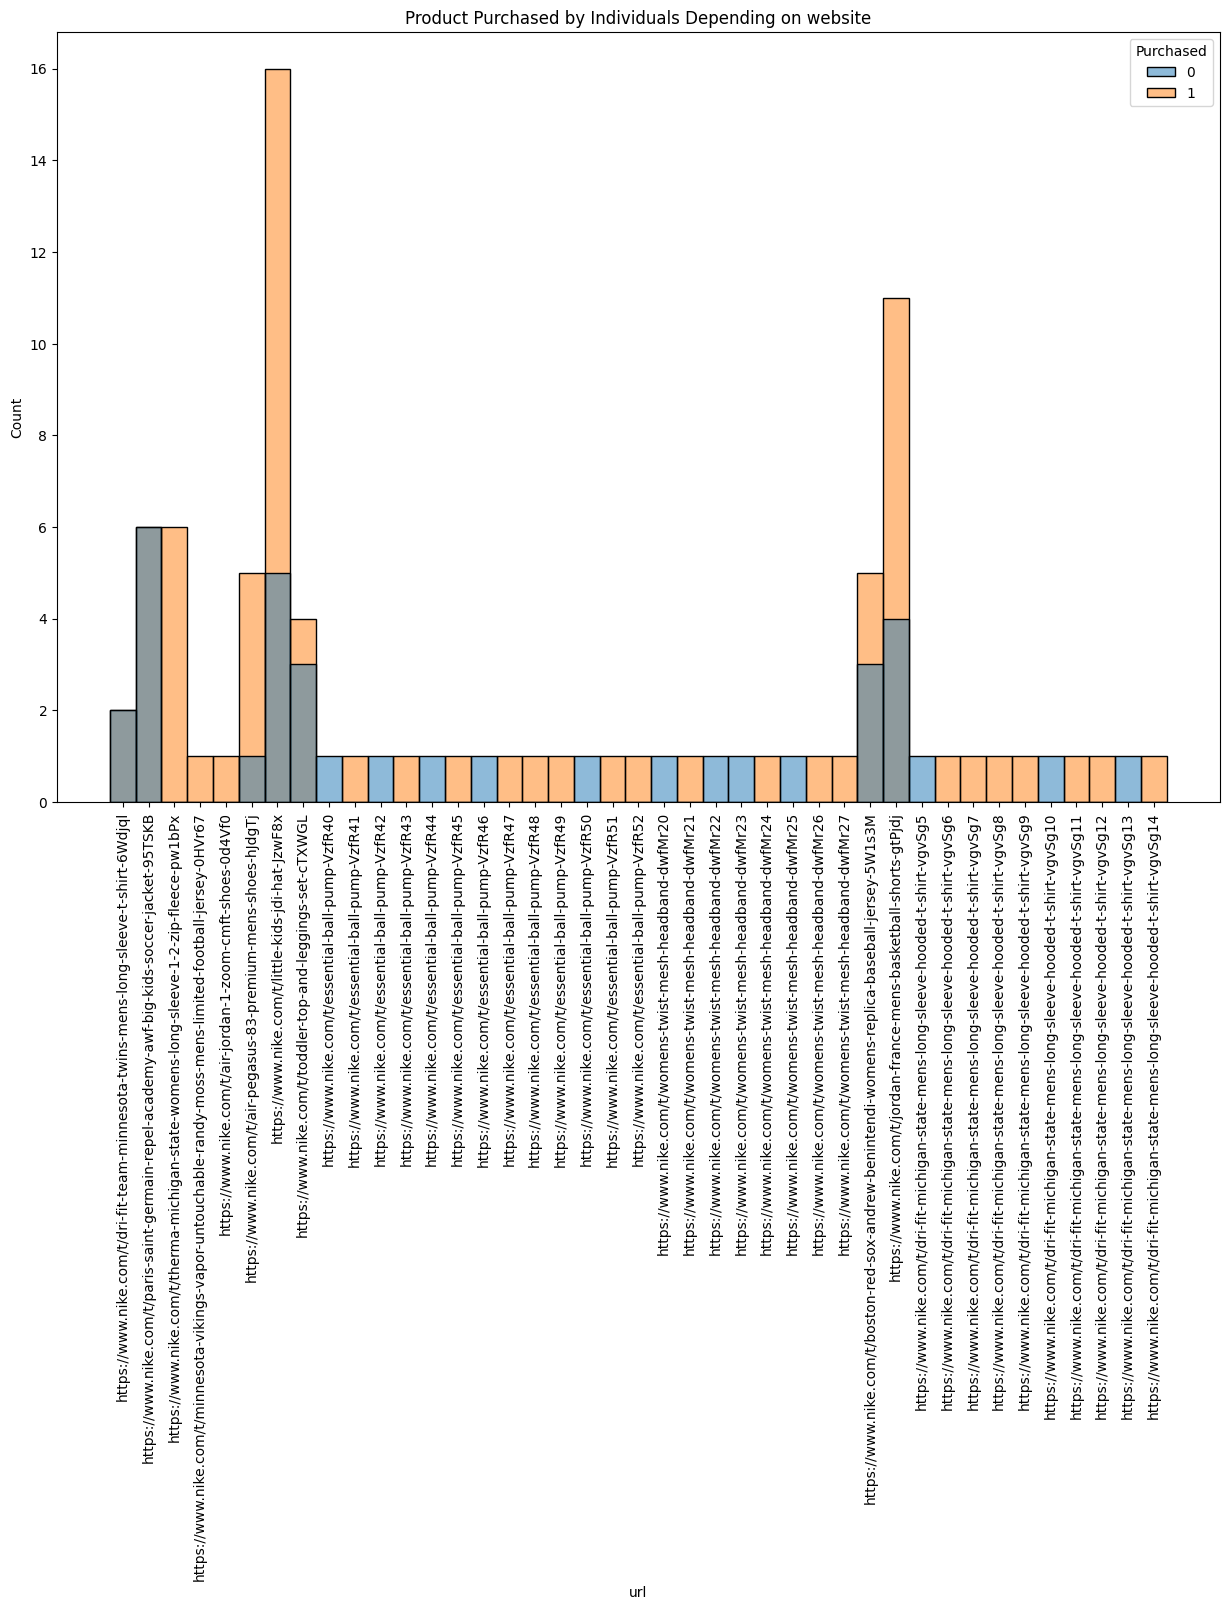

In [37]:
plt.figure(figsize=(15,10))
plt.title("Product Purchased by Individuals Depending on website")
plt.xticks(rotation = 90, fontsize = 10)
sns.histplot(data=df, x="url", hue="Purchased")
plt.show()

In [38]:
profile = pp.ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [39]:
df.drop('df_index',axis=1,inplace=True)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   url         112 non-null    object 
 1   name        112 non-null    object 
 2   sub_title   112 non-null    object 
 3   model       112 non-null    int64  
 4   color       110 non-null    object 
 5   price       112 non-null    float64
 6   currency    112 non-null    object 
 7   scraped_at  112 non-null    object 
 8   Age         112 non-null    int64  
 9   Purchased   112 non-null    int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 8.9+ KB


In [41]:
x=df.iloc[:,[0,2]].values

In [42]:
y=df.iloc[:,-1].values

In [43]:
y

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1])

In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x[:,0] = le.fit_transform(x[:,0])
print(x)


[[13 "Men's Long-Sleeve T-Shirt"]
 [13 "Women's Nike Dri-FIT Soccer Jersey Dress"]
 [13 "Women's Nike Dri-FIT Soccer Jersey Dress"]
 [13 "Women's Nike Dri-FIT Soccer Jersey Dress"]
 [30 "Women's Nike Dri-FIT Soccer Jersey Dress"]
 [30 "Women's Nike Dri-FIT Soccer Jersey Dress"]
 [30 "Women's Nike Dri-FIT Soccer Jersey Dress"]
 [30 "Men's Max 90 T-Shirt"]
 [30 "Men's Logo T-Shirt"]
 [30 "Men's Logo T-Shirt"]
 [30 "Men's Logo T-Shirt"]
 [30 "Men's Logo T-Shirt"]
 [30 "Men's Logo T-Shirt"]
 [30 "Men's Logo T-Shirt"]
 [30 "Men's Logo T-Shirt"]
 [30 "Men's Logo T-Shirt"]
 [31 "Women's Long-Sleeve 1/2-Zip Fleece"]
 [31 "Men's Nike Dri-FIT Soccer Shorts"]
 [31 "Men's Nike Dri-FIT Soccer Shorts"]
 [31 "Men's Nike Dri-FIT Soccer Shorts"]
 [31 "Men's Nike Dri-FIT Soccer Shorts"]
 [31 "Men's Nike Dri-FIT Soccer Shorts"]
 [29 "Men's Limited Football Jersey"]
 [0 'Shoes']
 [1 "Men's Shoes"]
 [1 "Men's Shoes"]
 [1 "Men's Shoes"]
 [1 "Men's Shoes"]
 [1 "Men's Shoes"]
 [1 "Men's Shoes"]
 [28 "Men's Sh

In [45]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x[:,1] = le.fit_transform(x[:,1])
print(x)

[[13 9]
 [13 26]
 [13 26]
 [13 26]
 [30 26]
 [30 26]
 [30 26]
 [30 10]
 [30 8]
 [30 8]
 [30 8]
 [30 8]
 [30 8]
 [30 8]
 [30 8]
 [30 8]
 [31 25]
 [31 11]
 [31 11]
 [31 11]
 [31 11]
 [31 11]
 [29 7]
 [0 19]
 [1 16]
 [1 16]
 [1 16]
 [1 16]
 [1 16]
 [1 16]
 [28 16]
 [28 12]
 [28 12]
 [28 12]
 [28 12]
 [28 15]
 [28 15]
 [28 15]
 [28 15]
 [28 15]
 [28 15]
 [28 16]
 [28 16]
 [28 16]
 [28 16]
 [28 16]
 [28 16]
 [28 16]
 [28 16]
 [28 21]
 [28 16]
 [32 22]
 [32 0]
 [32 1]
 [32 28]
 [32 18]
 [32 20]
 [32 5]
 [14 24]
 [15 23]
 [16 6]
 [17 6]
 [18 6]
 [19 6]
 [20 6]
 [21 6]
 [22 6]
 [23 6]
 [24 6]
 [25 6]
 [26 6]
 [33 6]
 [34 6]
 [35 6]
 [36 6]
 [37 6]
 [38 6]
 [39 6]
 [40 17]
 [2 17]
 [2 17]
 [2 17]
 [2 17]
 [2 17]
 [2 17]
 [2 17]
 [2 17]
 [27 17]
 [27 17]
 [27 17]
 [27 17]
 [27 17]
 [27 17]
 [27 16]
 [27 4]
 [27 13]
 [27 27]
 [27 3]
 [27 3]
 [27 3]
 [27 3]
 [27 3]
 [8 3]
 [9 3]
 [10 3]
 [11 3]
 [12 3]
 [3 2]
 [4 14]
 [5 14]
 [6 14]
 [7 14]]


In [46]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2,random_state = 1)
print(xtrain)

[[32 28]
 [27 17]
 [28 12]
 [23 6]
 [28 16]
 [28 16]
 [27 17]
 [28 12]
 [32 18]
 [15 23]
 [30 8]
 [28 12]
 [12 3]
 [31 11]
 [7 14]
 [1 16]
 [28 15]
 [27 17]
 [28 15]
 [22 6]
 [27 16]
 [2 17]
 [28 15]
 [2 17]
 [18 6]
 [2 17]
 [0 19]
 [28 12]
 [35 6]
 [27 3]
 [30 26]
 [39 6]
 [30 8]
 [27 4]
 [28 16]
 [32 22]
 [28 16]
 [8 3]
 [32 0]
 [1 16]
 [5 14]
 [28 16]
 [1 16]
 [26 6]
 [10 3]
 [28 21]
 [31 11]
 [13 26]
 [28 16]
 [4 14]
 [28 16]
 [2 17]
 [30 8]
 [16 6]
 [13 9]
 [27 3]
 [32 5]
 [29 7]
 [17 6]
 [19 6]
 [30 10]
 [6 14]
 [30 8]
 [2 17]
 [24 6]
 [27 27]
 [30 8]
 [1 16]
 [1 16]
 [30 8]
 [2 17]
 [31 11]
 [31 11]
 [28 16]
 [1 16]
 [30 26]
 [33 6]
 [38 6]
 [13 26]
 [31 25]
 [20 6]
 [2 17]
 [30 26]
 [37 6]
 [30 8]
 [34 6]
 [30 8]
 [3 2]
 [28 15]]


# 1. Decision Tree

In [47]:
model = DecisionTreeClassifier()
model.fit(xtrain, ytrain)
y_pred = model.predict(xtest)

In [48]:
from sklearn.metrics import accuracy_score
acc1 = accuracy_score(y_pred,ytest)
print(acc1)

0.5217391304347826


In [49]:
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.20      0.12      0.15         8
           1       0.61      0.73      0.67        15

    accuracy                           0.52        23
   macro avg       0.41      0.43      0.41        23
weighted avg       0.47      0.52      0.49        23



# 2. Random Forest Classifoier

In [50]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier()
model2.fit(xtrain, ytrain)
y_pred2 = model2.predict(xtest)

In [51]:
from sklearn.metrics import accuracy_score
acc2 = accuracy_score(y_pred2,ytest)
print(acc2)

0.5217391304347826


In [52]:
print(classification_report(ytest, y_pred2))

              precision    recall  f1-score   support

           0       0.20      0.12      0.15         8
           1       0.61      0.73      0.67        15

    accuracy                           0.52        23
   macro avg       0.41      0.43      0.41        23
weighted avg       0.47      0.52      0.49        23



# 3. Logistic REgression

In [53]:
from sklearn.linear_model import LogisticRegression
model3 = LogisticRegression()
model3.fit(xtrain, ytrain)
y_pred3 = model3.predict(xtest)

In [54]:
from sklearn.metrics import accuracy_score
acc3 = accuracy_score(y_pred3,ytest)
print(acc3)

0.6521739130434783


In [55]:
print(classification_report(ytest, y_pred3))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.65      1.00      0.79        15

    accuracy                           0.65        23
   macro avg       0.33      0.50      0.39        23
weighted avg       0.43      0.65      0.51        23



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 4. KNN

In [56]:
from sklearn.neighbors import KNeighborsClassifier
model4= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
model4.fit(xtrain, ytrain)
y_pred4 = model4.predict(xtest)

In [57]:
from sklearn.metrics import accuracy_score
acc4 = accuracy_score(y_pred4,ytest)
print(acc4)

0.6086956521739131


In [58]:
print(classification_report(ytest, y_pred4))

              precision    recall  f1-score   support

           0       0.33      0.12      0.18         8
           1       0.65      0.87      0.74        15

    accuracy                           0.61        23
   macro avg       0.49      0.50      0.46        23
weighted avg       0.54      0.61      0.55        23



In [59]:
np.array(xtrain)

array([[32, 28],
       [27, 17],
       [28, 12],
       [23, 6],
       [28, 16],
       [28, 16],
       [27, 17],
       [28, 12],
       [32, 18],
       [15, 23],
       [30, 8],
       [28, 12],
       [12, 3],
       [31, 11],
       [7, 14],
       [1, 16],
       [28, 15],
       [27, 17],
       [28, 15],
       [22, 6],
       [27, 16],
       [2, 17],
       [28, 15],
       [2, 17],
       [18, 6],
       [2, 17],
       [0, 19],
       [28, 12],
       [35, 6],
       [27, 3],
       [30, 26],
       [39, 6],
       [30, 8],
       [27, 4],
       [28, 16],
       [32, 22],
       [28, 16],
       [8, 3],
       [32, 0],
       [1, 16],
       [5, 14],
       [28, 16],
       [1, 16],
       [26, 6],
       [10, 3],
       [28, 21],
       [31, 11],
       [13, 26],
       [28, 16],
       [4, 14],
       [28, 16],
       [2, 17],
       [30, 8],
       [16, 6],
       [13, 9],
       [27, 3],
       [32, 5],
       [29, 7],
       [17, 6],
       [19, 6],
       [30, 10

# Comparing All the Models

Text(0.5, 1.0, 'Classification Model Scores')

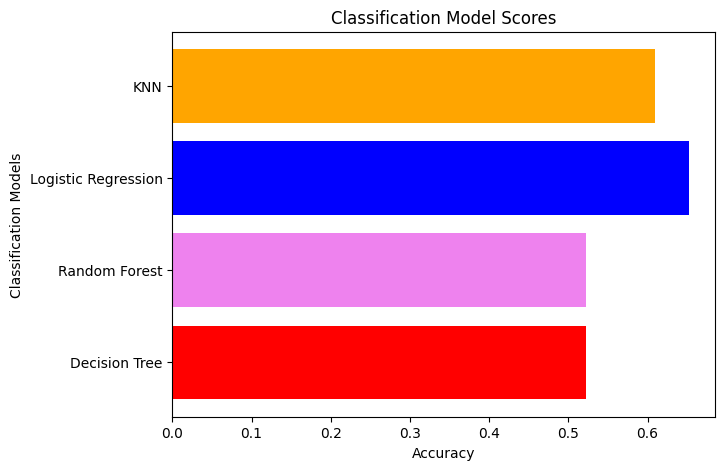

In [60]:
import matplotlib.pyplot as plt
models=['Decision Tree','Random Forest','Logistic Regression','KNN']
accuracy=[acc1,acc2,acc3,acc4]

plt.figure(figsize=(7,5))
c = ['red', 'violet', 'blue','orange']
plt.barh(models,accuracy,align='center',color=c)

plt.xlabel("Accuracy")
plt.ylabel("Classification Models")
plt.title("Classification Model Scores")

# Testing the Model

In [61]:
example_measures = [[19,23]]
prediction = model.predict(example_measures)
print(prediction)

[1]


In [62]:
example_measures = [[13, 9]]
prediction = model4.predict(example_measures)
print(prediction)

[0]
